In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

# Read Dataset

## Read csv from drive

In [ ]:
stock_df = pd.read_csv("/content/drive/MyDrive/LJMU/Anbu/data/TSLA (1).csv", parse_dates=["Date"])
print(f'Shape of dataframe: {stock_df.shape}')
stock_df.head()

Shape of dataframe: (2872, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2872 non-null   datetime64[ns]
 1   Open       2872 non-null   float64       
 2   High       2872 non-null   float64       
 3   Low        2872 non-null   float64       
 4   Close      2872 non-null   float64       
 5   Adj Close  2872 non-null   float64       
 6   Volume     2872 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
data_table.DataTable(stock_df.describe().T, include_index=True)

,count,mean,std,min,25%,50%,75%,max
Open,2872.0,7.065717e+01,9.986616e+01,1.774667e+00,1.362850e+01,1.782967e+01,9.956634e+01,4.114700e+02
High,2872.0,7.225220e+01,1.021715e+02,1.790000e+00,1.383283e+01,1.807933e+01,1.021657e+02,4.144967e+02
Low,2872.0,6.892144e+01,9.728906e+01,1.509333e+00,1.341233e+01,1.755400e+01,9.721667e+01,4.056667e+02
Close,2872.0,7.062810e+01,9.976170e+01,1.519333e+00,1.363283e+01,1.784567e+01,9.943000e+01,4.099700e+02
Adj Close,2872.0,7.062810e+01,9.976170e+01,1.519333e+00,1.363283e+01,1.784567e+01,9.943000e+01,4.099700e+02
Volume,2872.0,1.055150e+08,8.112693e+07,5.473500e+06,5.653785e+07,8.591100e+07,1.289130e+08,9.140820e+08


In [ ]:
# Before proceeding, check for NULL values
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualisation

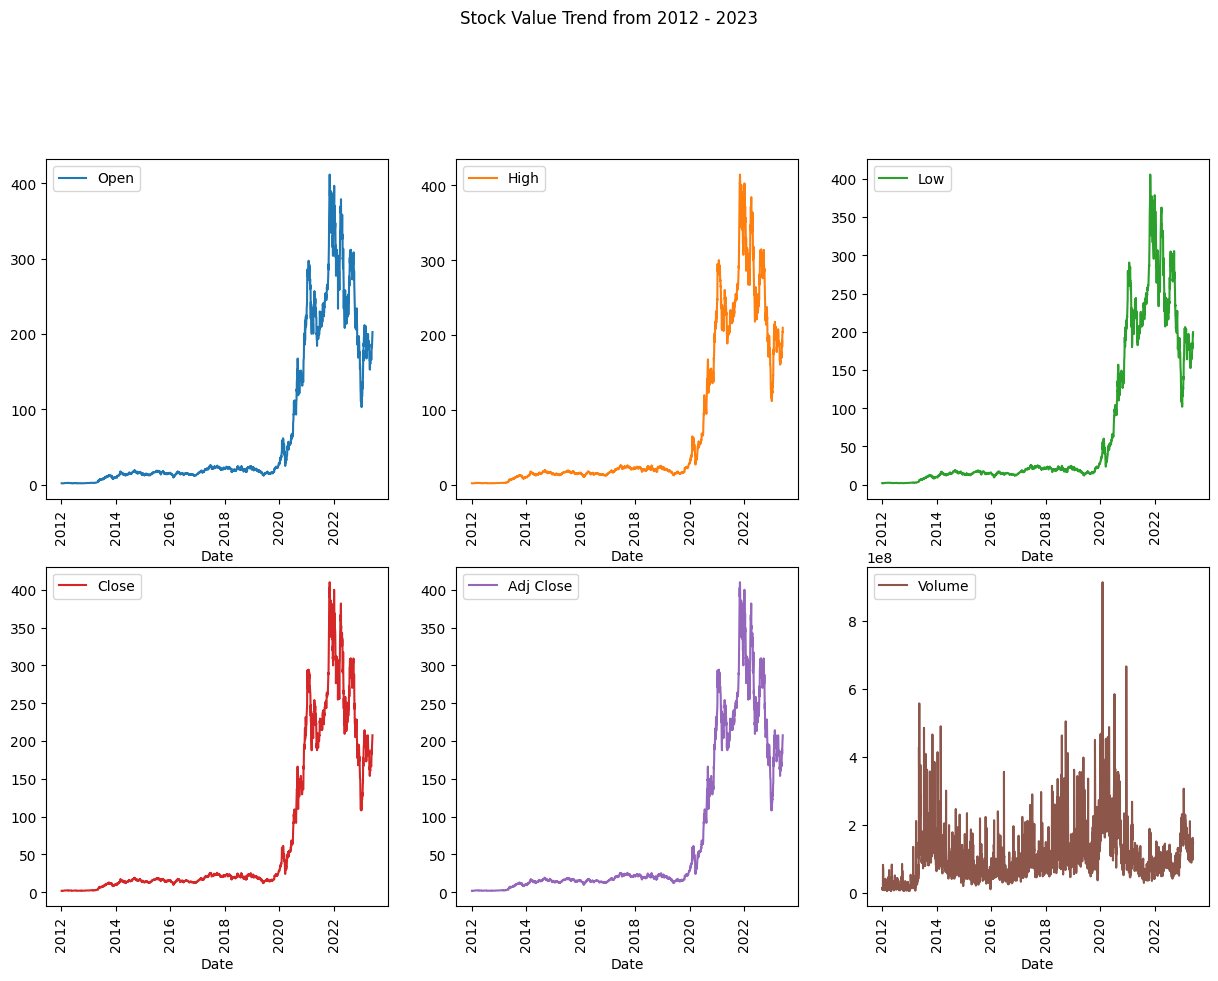

In [ ]:
# A glimpse of how the market shares varied over the given time

# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
stock_df.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2012 - 2023", rot = 90);

## Visualize the spread and skweness through the distribution plot

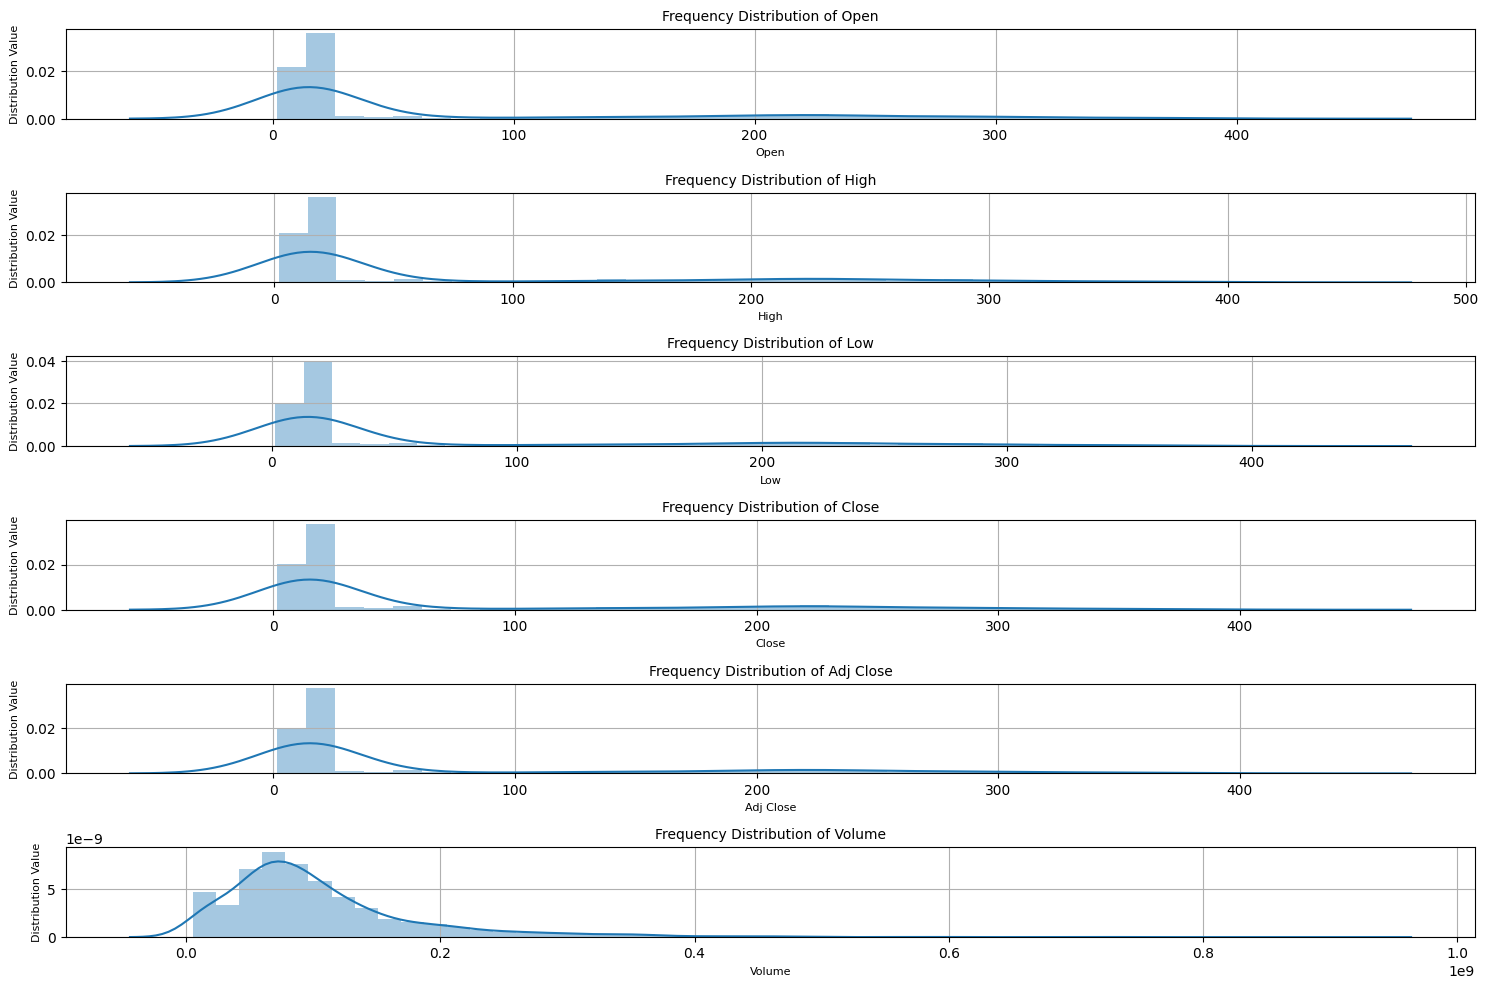

In [ ]:
# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(stock_df[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

## Check for factors responsible in overall volume trade - Perform default correlation using Pearson Method

<Axes: >

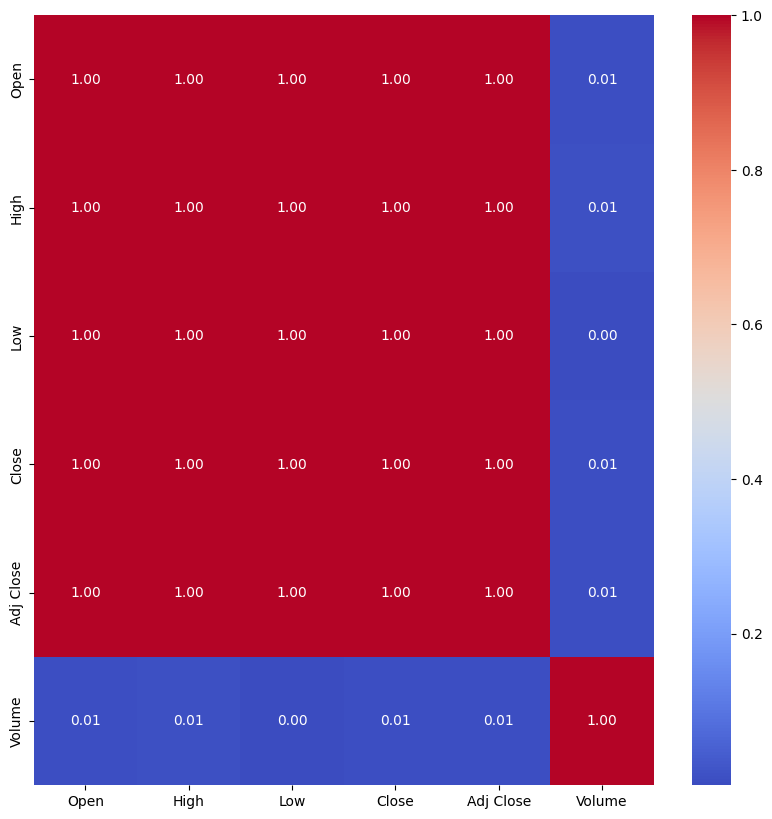

In [ ]:
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = stock_df.corr()

# Plot the correlation matrix in a heatmap to understand better
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values, annot=True, cmap='coolwarm', fmt=".2f" )

In [ ]:
# View the matrix in a table to identify the numerical values of strengths
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999704,0.999582,0.999147,0.999147,0.007778
High,0.999704,1.000000,0.999591,0.999615,0.999615,0.011904
Low,0.999582,0.999591,1.000000,0.999656,0.999656,0.003838
Close,0.999147,0.999615,0.999656,1.000000,1.000000,0.008774
Adj Close,0.999147,0.999615,0.999656,1.000000,1.000000,0.008774
Volume,0.007778,0.011904,0.003838,0.008774,0.008774,1.000000


#Outlier Detection and Removal

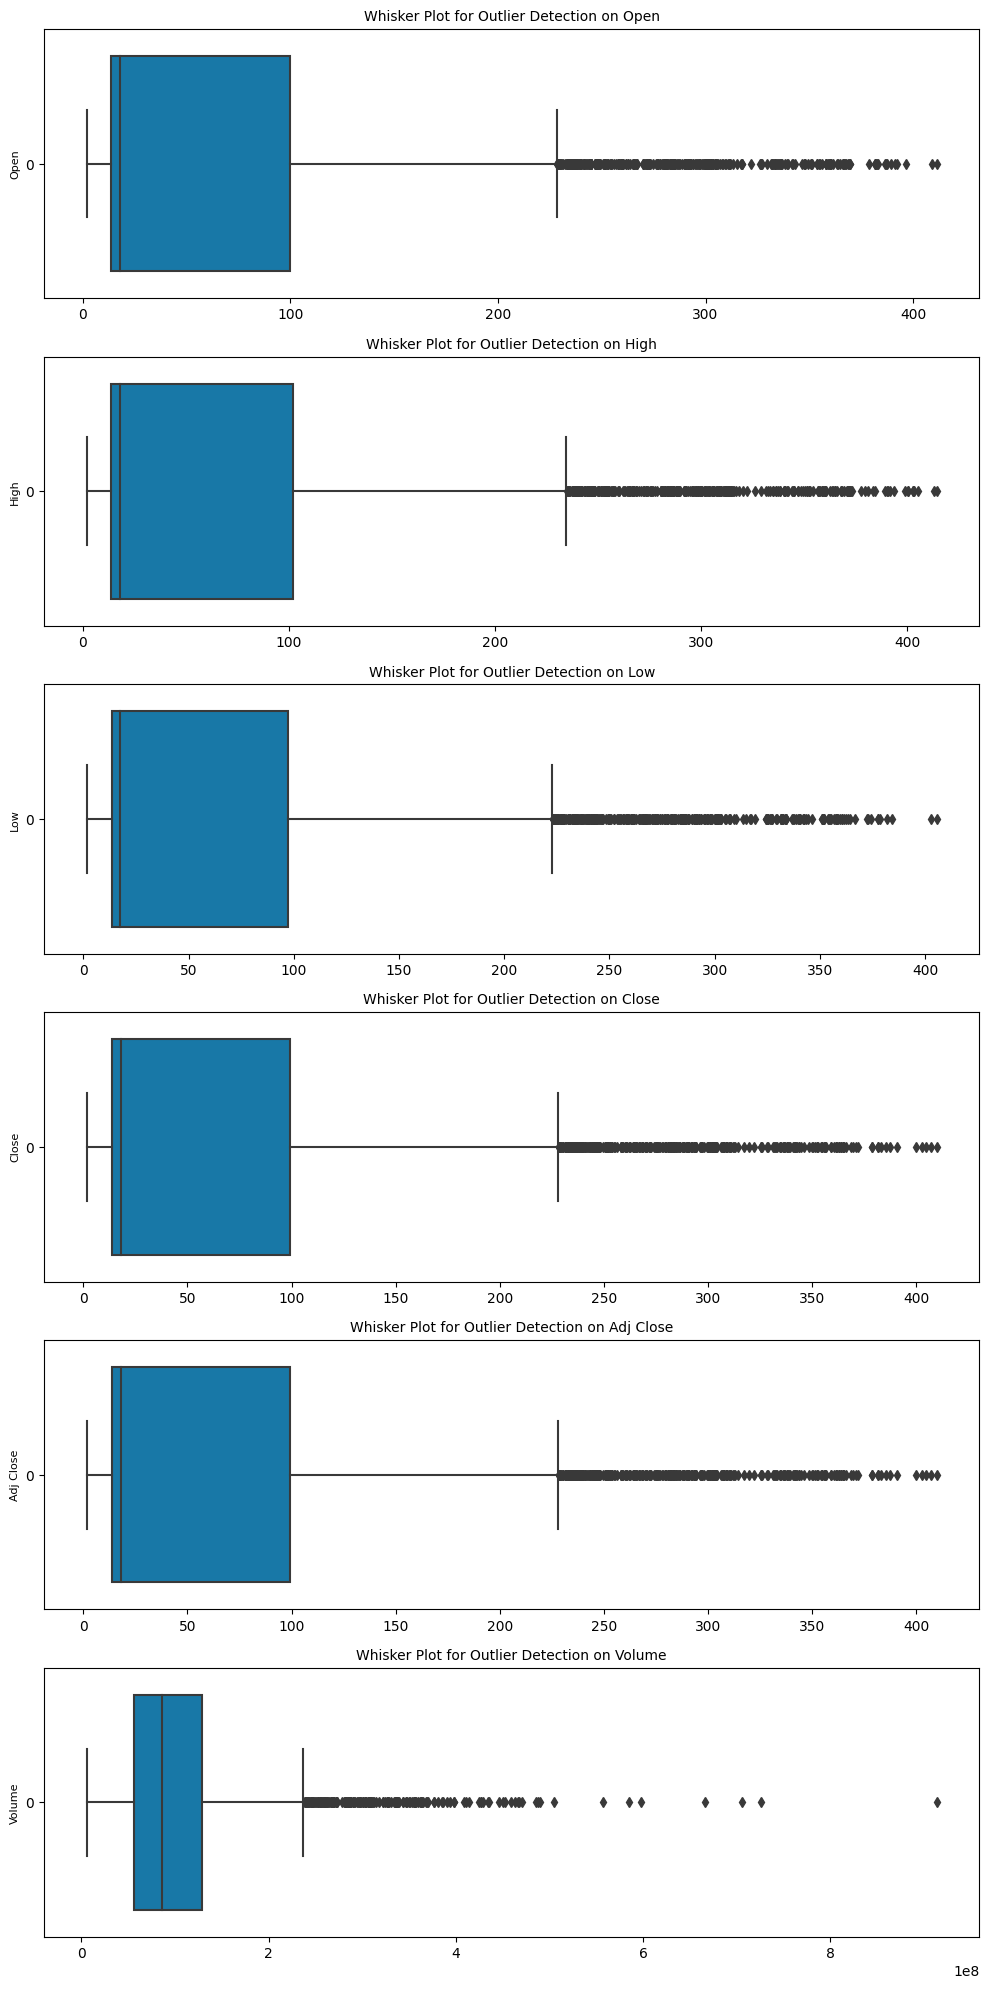

In [ ]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(stock_df[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

##Outlier Removal

In [ ]:
from scipy import stats

In [ ]:
# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = stock_df.describe()
Descriptive_Statistics = Descriptive_Statistics.T # Convert into a dataframe

# Extract the IQR values
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
stock_df = stock_df[(np.abs(stats.zscore(stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] # abs for (+/-) 3-sigma
stock_df = stock_df.reset_index() # Due to elimination of rows, index has to be reset

# Now compare the new dimension with the old one (The one mentioned during the reading of the file)
print(f'shaper of data : {stock_df.shape}')
stock_df.head() # 2359 * 8

shaper of data : (2795, 8)


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


##Extensive Analysis on Historical Data to Find Patterns

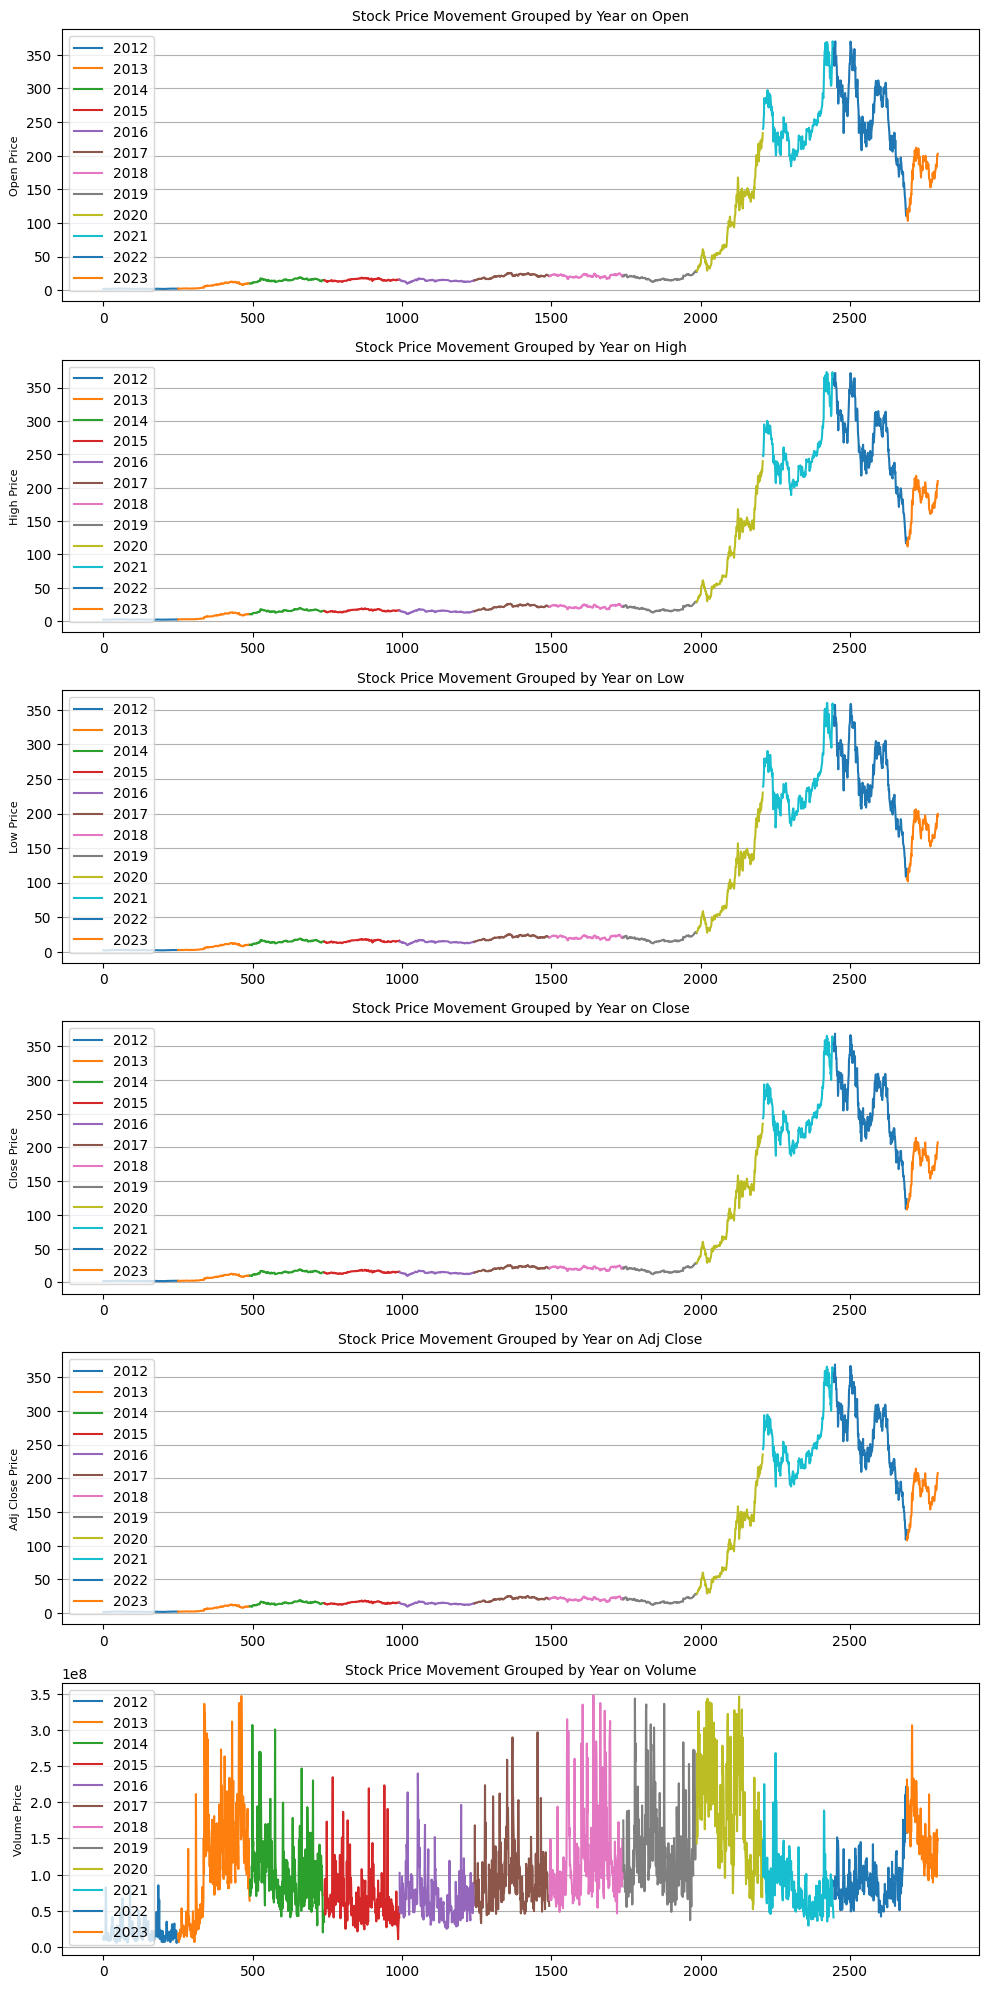

In [ ]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Decompose the time series year-wise and month-wise to analyse further
stock_df['Year'] = stock_df['Date'].dt.year
stock_df['Month'] = stock_df['Date'].dt.month
stock_df['WeekDay'] = stock_df['Date'].dt.weekday

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    stock_df.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

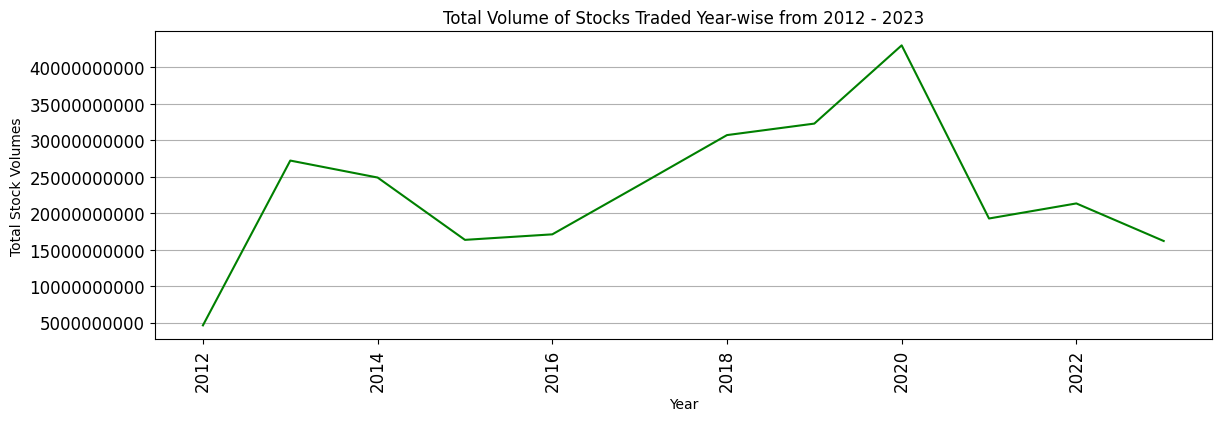

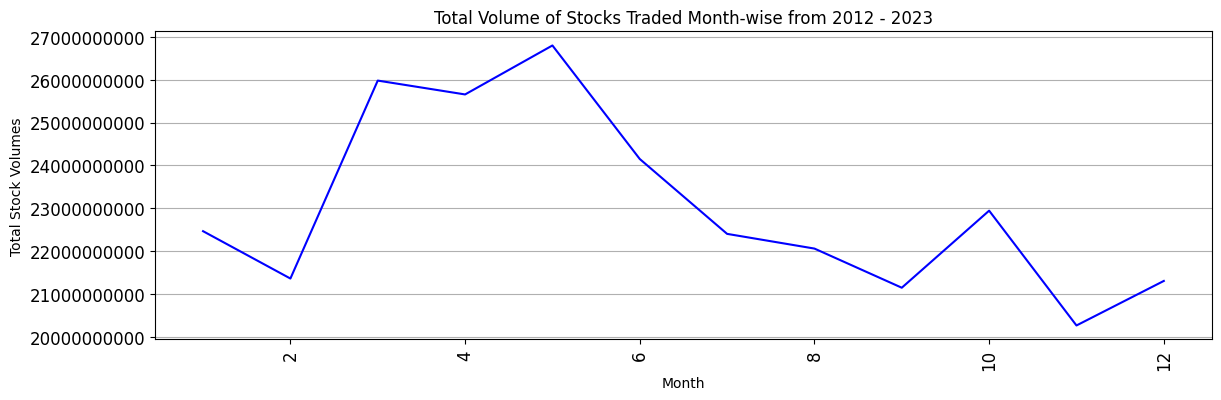

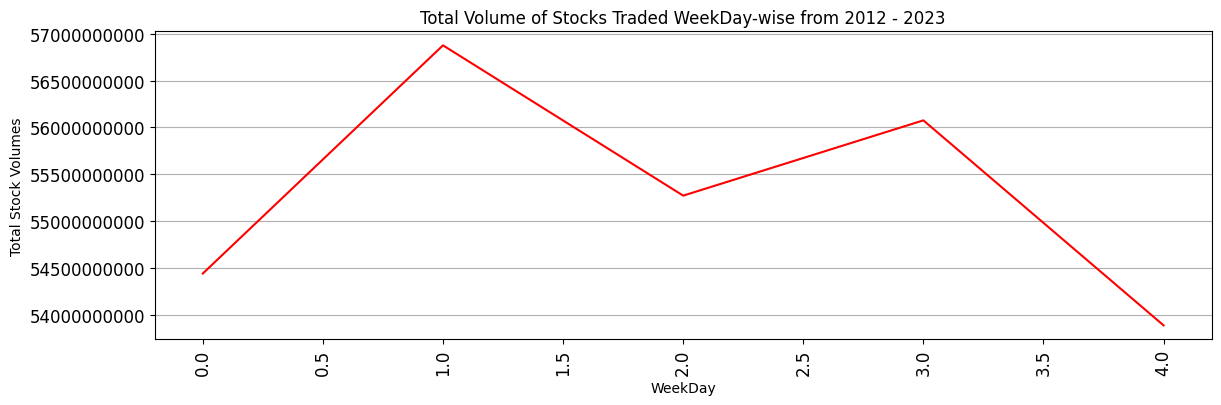

In [ ]:
# Visualzing only the total volume of stocks traded grouped year-wise
check = stock_df.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2012 - 2023", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped month-wise
check = stock_df.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2012 - 2023", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped weekday-wise
check = stock_df.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise from 2012 - 2023", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

##Pie charts to show the extensive influence of time in the overall volume trade

In [ ]:
from pandas.plotting import table

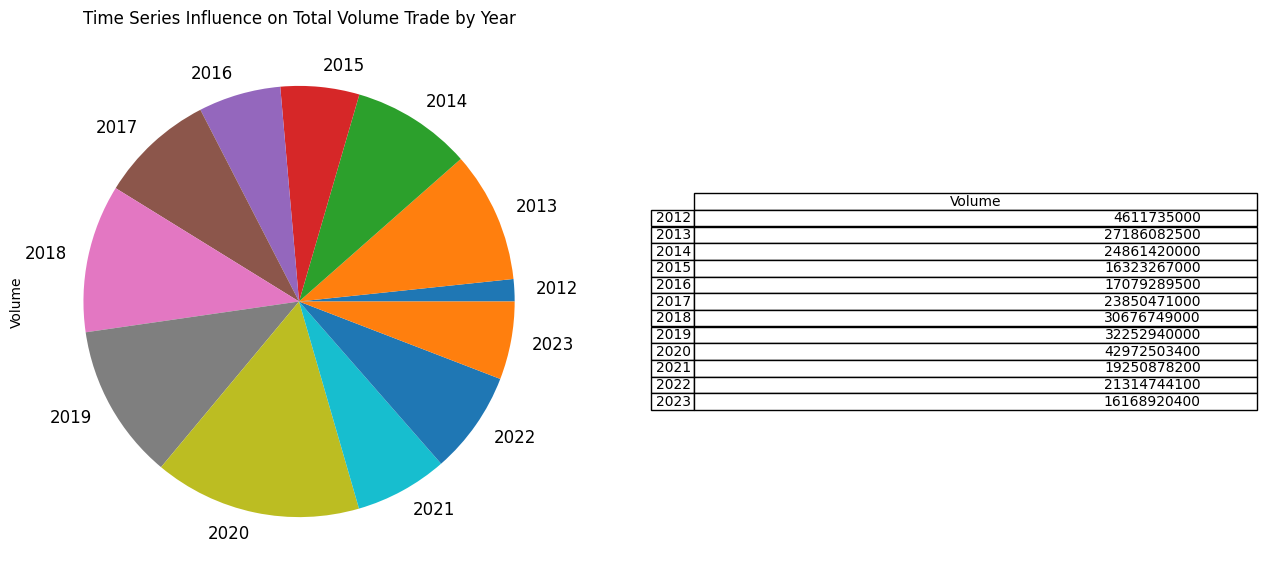

In [ ]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = stock_df.groupby('Year')[col_list].sum()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(True)
# tbl.set_fontsize(15)
plt.show()

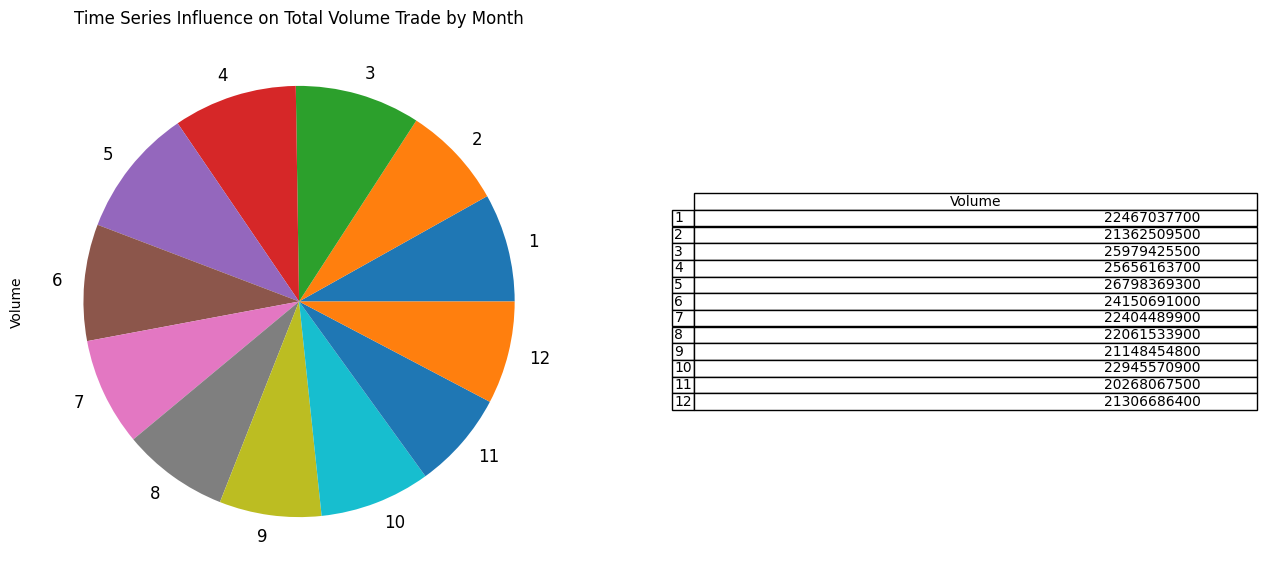

In [ ]:
# Analyse based on Month
for i, col_list in enumerate(Column_List):
    var = stock_df.groupby('Month')[col_list].sum()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
plt.show()

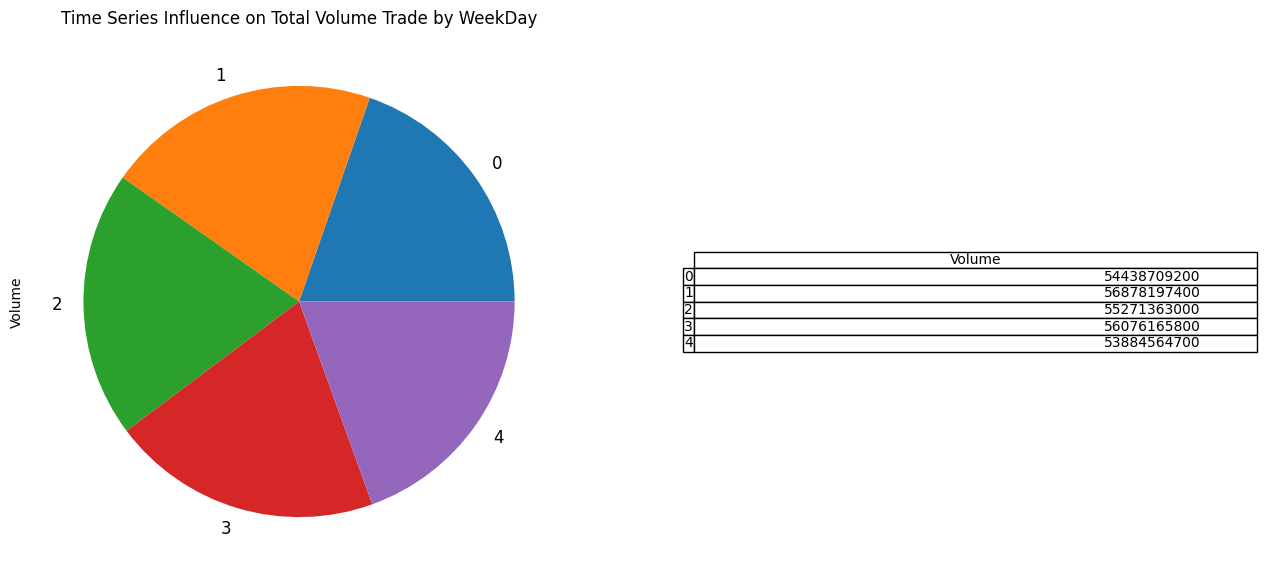

In [ ]:
# Analyse based on WeekDay
for i, col_list in enumerate(Column_List):
    var = stock_df.groupby('WeekDay')[col_list].sum()

# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
plt.show()

# RQ1. How can explainable machine learning algorithms analyse this dataset to identify long-term market trends and investment patterns.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

## Train Test Split

In [ ]:
data_df = stock_df.copy()

In [ ]:
data_df.shape

(2795, 11)

In [ ]:
# Extract features (X) and target (y)
features = ['Open', 'High', 'Low', 'Close', 'Adj Close']
X = data_df[features]
y = data_df['Close']

# Convert X and y to NumPy arrays
X_arr = X.values
y_arr = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

## Run All regressor Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## Define  Models

In [ ]:
# Regression models
regression_models = [
    RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    DecisionTreeRegressor(random_state=42),
    GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, subsample=0.5, loss='quantile', random_state=42)
]

## Evaluation of model

In [ ]:
# Generalized code snippet with evaluation metrics
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    mae = mean_absolute_error(y_test, predictions)

    return rmse, mape, mae

In [ ]:
# Usage
for model in regression_models:
    rmse, mape, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"MAE: {mae:.2f}\n")

Model: RandomForestRegressor
RMSE: 1.24
MAPE: 4.05%
MAE: 0.91

Model: DecisionTreeRegressor
RMSE: 0.57
MAPE: 0.23%
MAE: 0.16

Model: GradientBoostingRegressor
RMSE: 5.57
MAPE: 54.10%
MAE: 3.30



## Interpret Model Results with SHAP (SHapley Additive exPlanations)
SHAP is a powerful library for model explainability. It can help you understand the importance of each feature in your model's predictions.

## For Random Forest Model - explaining Model Predictions

In [ ]:
rf_model = regression_models[0]

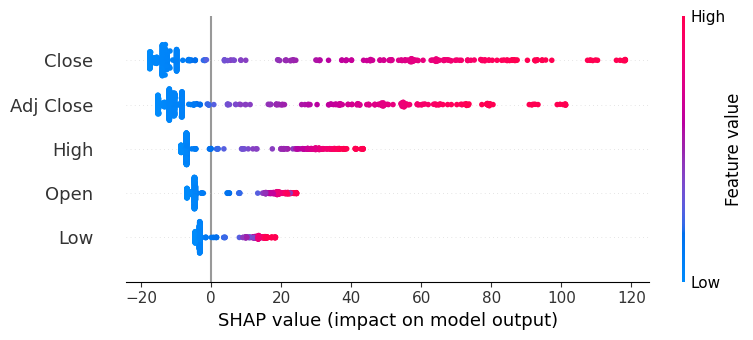

In [ ]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.Explainer(rf_model, X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)

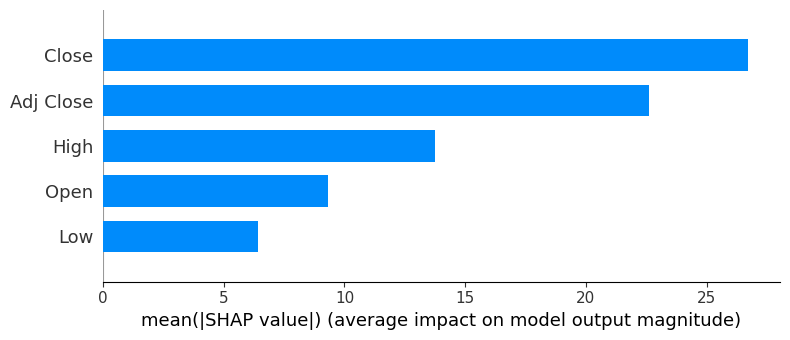

In [ ]:
# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")

In [ ]:
shap_values[0, :]

.values =
array([ -4.82446893,  -7.14545752,  -3.34630184, -13.93149559,
       -11.96425537])

.base_values =
54.966667764837474

.data =
array([11.341333, 11.927333, 11.323333, 11.849333, 11.849333])

In [ ]:
shap_values.values[0, :]

array([ -4.82446893,  -7.14545752,  -3.34630184, -13.93149559,
       -11.96425537])

In [ ]:
shap_values.data[0, :]

array([11.341333, 11.927333, 11.323333, 11.849333, 11.849333])

In [ ]:
shap_values.base_values[0]

54.966667764837474

In [ ]:
# Assuming X_test is a NumPy array
sample_data = X_test[0, :]

# Now, sample_data contains the values for the first row of X_test
print(sample_data)

[11.341333 11.927333 11.323333 11.849333 11.849333]


In [ ]:
explainer.expected_value

54.966667764837474

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# Force plot for a specific prediction (replace '0' with the desired index)
shap.force_plot(explainer.expected_value, shap_values.values[0, :], shap_values.data[0, :], feature_names=features)

## Decision Tree - Explain Model Predictions

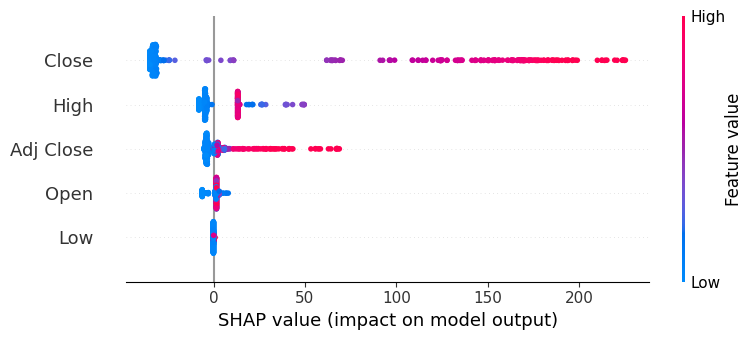

In [ ]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.Explainer(regression_models[1], X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)

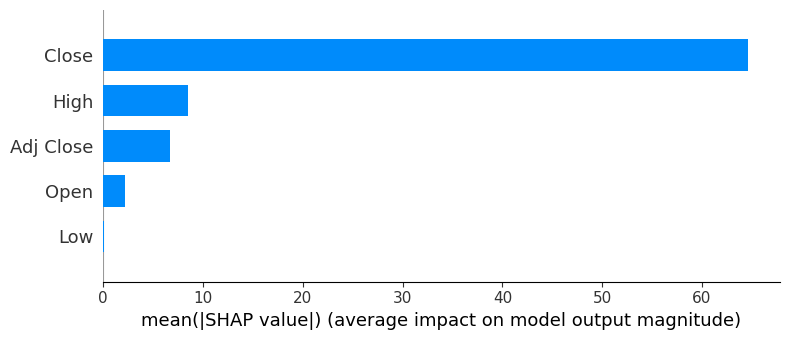

In [ ]:
# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# Force plot for a specific prediction (replace '0' with the desired index)
shap.force_plot(explainer.expected_value, shap_values.values[0, :], shap_values.data[0, :], feature_names=features)

## GradientBoosting - Explaining Model Predictions

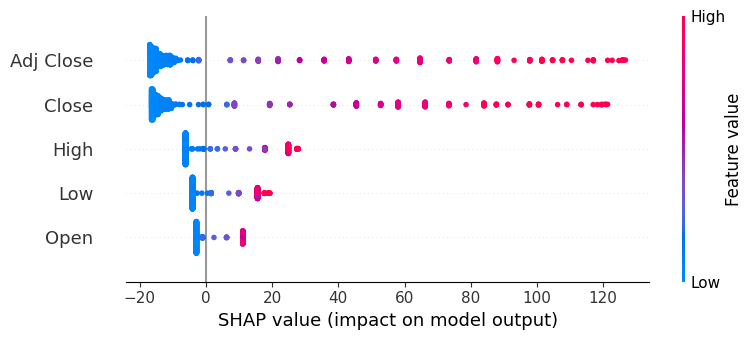

In [ ]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.Explainer(regression_models[-1], X_train)

# Calculate SHAP values for the test data
shap_values = explainer(X_test)

# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)

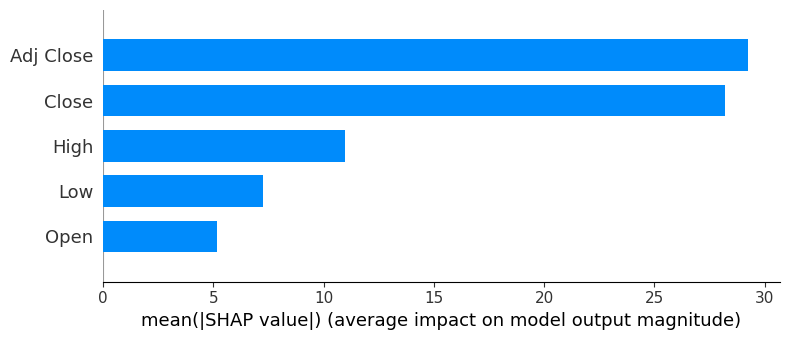

In [ ]:
# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# Force plot for a specific prediction (replace '0' with the desired index)
shap.force_plot(explainer.expected_value, shap_values.values[0, :], shap_values.data[0, :], feature_names=features)

In [ ]:
financial_data = data_df.copy()

# Calculate percentage change for each column
percentage_change = financial_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].pct_change()

# Drop the first row since it will have NaN (no previous value to calculate change)
percentage_change = percentage_change.dropna()

print(percentage_change)

          Open      High       Low     Close  Adj Close
1    -0.025224 -0.028136 -0.005425 -0.013177  -0.013177
2    -0.015952 -0.025811 -0.023636 -0.021292  -0.021292
3    -0.020173 -0.005012 -0.016387 -0.007743  -0.007743
4    -0.007353 -0.010795 -0.010981  0.012635   0.012635
5     0.016296  0.009822  0.043262  0.013578   0.013578
...        ...       ...       ...       ...        ...
2790  0.023651  0.013896  0.013242  0.008584   0.008584
2791 -0.010293  0.063283  0.021874  0.047162   0.047162
2792  0.083848  0.029607  0.070449  0.041363   0.041363
2793 -0.001599 -0.002592 -0.012201  0.013770   0.013770
2794  0.014065  0.028684  0.021781  0.017604   0.017604

[2794 rows x 5 columns]


# RQ2: What features and information sources are required for XAI systems that precisely forecast short-term volatility in financial markets?

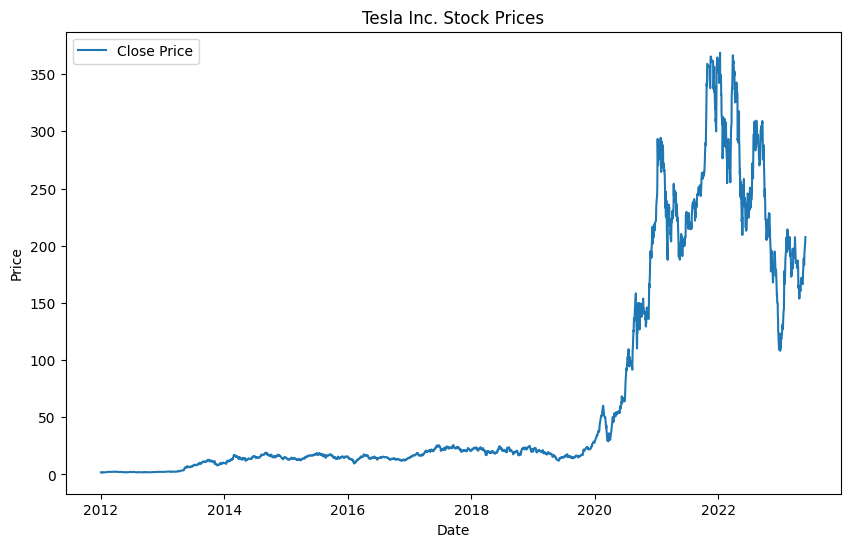

In [ ]:
# Visualize stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Date'], financial_data['Close'], label='Close Price')
plt.title('Tesla Inc. Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

To calculate and visualize some common technical indicators like Moving Averages (MA), Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), and Bollinger Bands

### Moving Averages (MA)

In [ ]:
# Calculate Moving Averages (MA)
financial_data['MA_20'] = financial_data['Close'].rolling(window=20).mean()
financial_data['MA_50'] = financial_data['Close'].rolling(window=50).mean()
financial_data['MA_100'] = financial_data['Close'].rolling(window=100).mean()
financial_data['MA_200'] = financial_data['Close'].rolling(window=200).mean()

# Visualize Moving Averages (MA)

### Relative Strength Index (RSI)

In [ ]:
# Calculate Relative Strength Index (RSI)
delta = financial_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
financial_data['RSI'] = 100 - (100 / (1 + rs))

### Moving Average Convergence Divergence (MACD):

In [ ]:
# Calculate Moving Average Convergence Divergence (MACD)
ema_12 = financial_data['Close'].ewm(span=12, min_periods=0).mean()
ema_26 = financial_data['Close'].ewm(span=26, min_periods=0).mean()
financial_data['MACD'] = ema_12 - ema_26
financial_data['Signal'] = financial_data['MACD'].ewm(span=9, min_periods=0).mean()


### Bollinger Bands

In [ ]:
# Calculate Bollinger Bands
financial_data['Middle_band'] = financial_data['Close'].rolling(window=20).mean()
financial_data['Upper_band'] = financial_data['Middle_band'] + 2 * financial_data['Close'].rolling(window=20).std()
financial_data['Lower_band'] = financial_data['Middle_band'] - 2 * financial_data['Close'].rolling(window=20).std()


### Visualise Technical Indicators for short-term Analysis

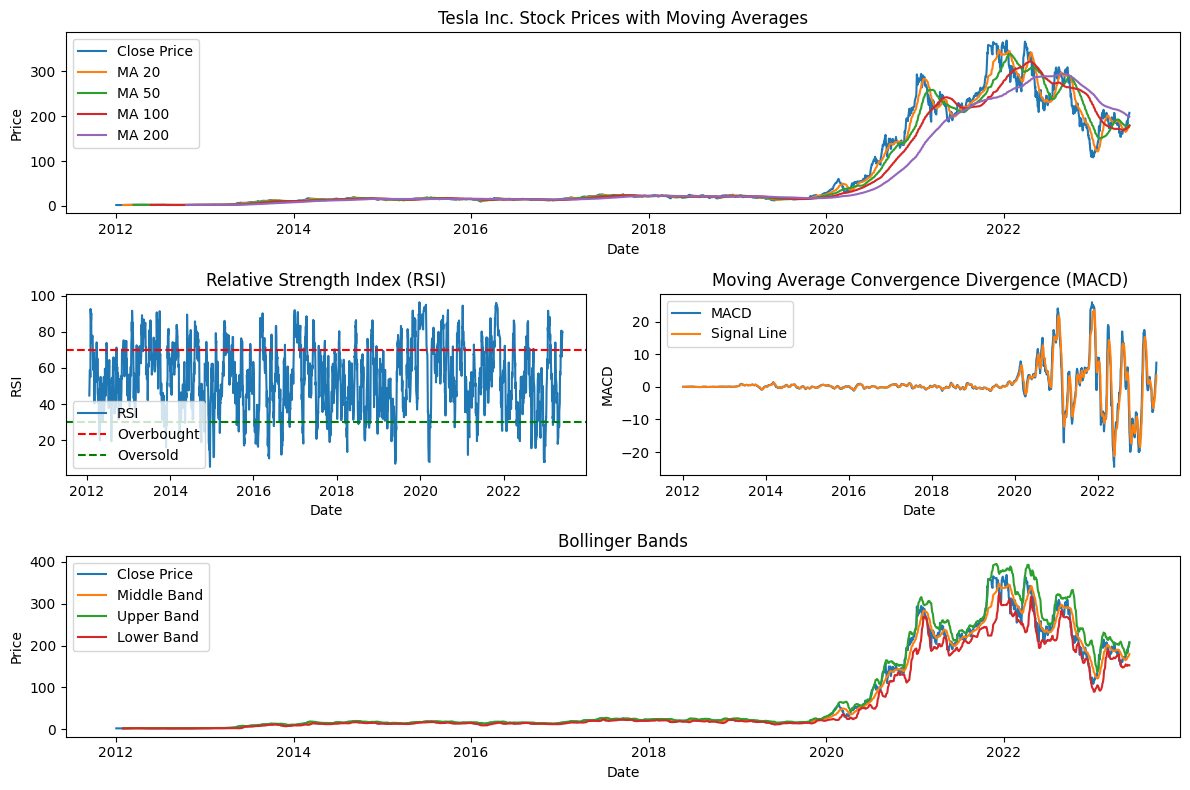

In [ ]:

# Plotting
plt.figure(figsize=(12, 8))

# Price with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(financial_data['Date'], financial_data['Close'], label='Close Price')
plt.plot(financial_data['Date'], financial_data['MA_20'], label='MA 20')
plt.plot(financial_data['Date'], financial_data['MA_50'], label='MA 50')
plt.plot(financial_data['Date'], financial_data['MA_100'], label='MA 100')
plt.plot(financial_data['Date'], financial_data['MA_200'], label='MA 200')
plt.title('Tesla Inc. Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# RSI
plt.subplot(3, 2, 3)
plt.plot(financial_data['Date'], financial_data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# MACD
plt.subplot(3, 2, 4)
plt.plot(financial_data['Date'], financial_data['MACD'], label='MACD')
plt.plot(financial_data['Date'], financial_data['Signal'], label='Signal Line')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# Bollinger Bands (occupying the entire third row)
plt.subplot(3, 1, 3)
plt.plot(financial_data['Date'], financial_data['Close'], label='Close Price')
plt.plot(financial_data['Date'], financial_data['Middle_band'], label='Middle Band')
plt.plot(financial_data['Date'], financial_data['Upper_band'], label='Upper Band')
plt.plot(financial_data['Date'], financial_data['Lower_band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# QR3: Which XAI algorithms are best able to identify long-term market trends and short-term price fluctuations in historical data?

### Creating ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Extract the features and target.
features = ['Open', 'High', 'Low', 'Close', 'Adj Close']
X = data_df[features]
y = data_df['Close']

# Splitting data into train and test sets
train_ar, test_ar = train_test_split(y, test_size=0.2, shuffle=False)

In [ ]:
# Create the ARIMA model.
model_ar = ARIMA(y_train, order=(0, 1, 0))

# Fit the model to the training data.
fit_arima_0_1_0 = model_ar.fit()

# Make predictions on the test set.
predictions_arima_1 = fit_arima_0_1_0.predict(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, typ='levels')

# Evaluate the model's performance.
print(f"Mean Absolute Error (For order 0-1-0): {mean_absolute_error(y_test, predictions_arima_1)}")

Mean Absolute Error (For order 0-1-0): 66.28549325044723


In [ ]:
# Create the ARIMA model.
model_ar = ARIMA(y_train, order=(1, 0, 1))

# Fit the model to the training data.
fit_arima_1_0_1 = model_ar.fit()

# Make predictions on the test set.
predictions_arima_1 = fit_arima_1_0_1.predict(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, typ='levels')

# Evaluate the model's performance.
print(f"Mean Absolute Error (For order 1-0-1): {mean_absolute_error(y_test, predictions_arima_1)}")

# Long-term trend analysis (ARIMA)
model_arima = ARIMA(train_ar, order=(5,1,0))  # ARIMA model with parameters


# Fit the model to the training data.
fit_arima = model_arima.fit()

# Make predictions on the test set.
predictions_arima = fit_arima.predict(start=len(train_ar), end=len(train_ar) + len(test_ar) - 1, typ='levels')
# y_pred_arima = fit_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model's performance.
print(f"Mean Absolute Error (For order 5-1-0): {mean_absolute_error(y_test, predictions_arima)}")

Mean Absolute Error (For order 1-0-1): 83.52697971680118
Mean Absolute Error (For order 5-1-0): 195.2547991526653


#QR4 How can interpretability help investors understand indicators influencing market trends and price fluctuations?

### Permutation Feature Importance

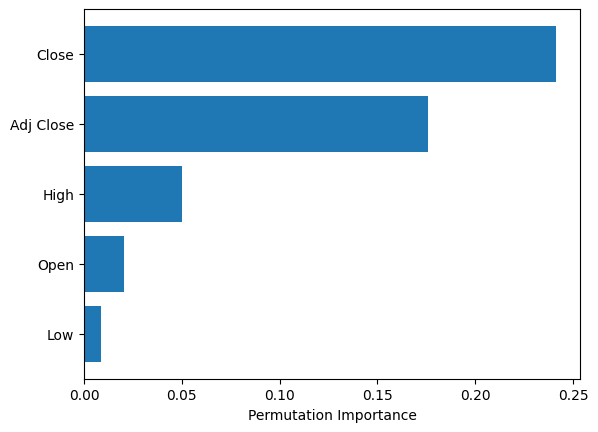

In [ ]:
# Finding Permutation Feature Importance
from sklearn.inspection import permutation_importance

# Permutation Feature Importance for Random Forest
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

### PartialDependenceDisplay & Individual Conditional Expectation (ICE) Plots

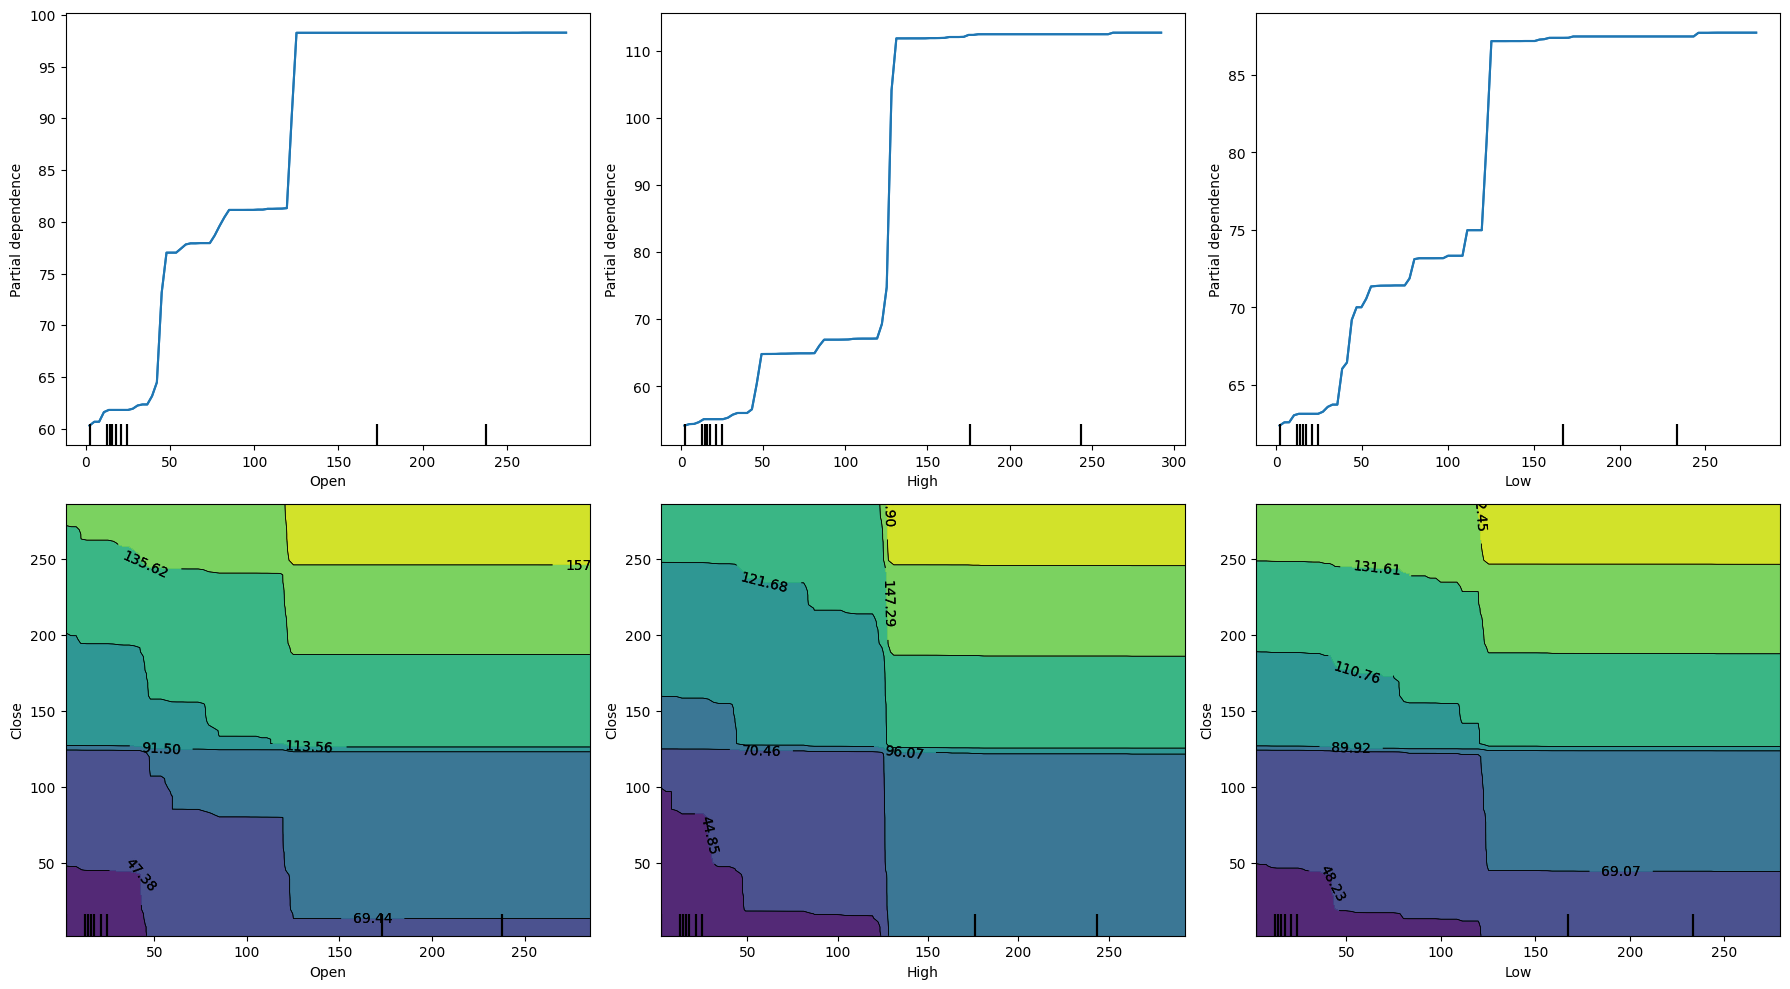

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Create the figure  size for each subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns for 6 subplots

features = [0, 1, 2, (0, 3), (1, 3), (2, 3)]

# Plot the PDPs
for i, feature in enumerate(features):
    ax1 = axes.flatten()[i]  # Get the current axis
    display = PartialDependenceDisplay.from_estimator(rf_model, X, [feature], ax=ax1)
    display.plot(ax=display.axes_)

plt.tight_layout()  # Adjust subplot layout for better visualization
plt.show()

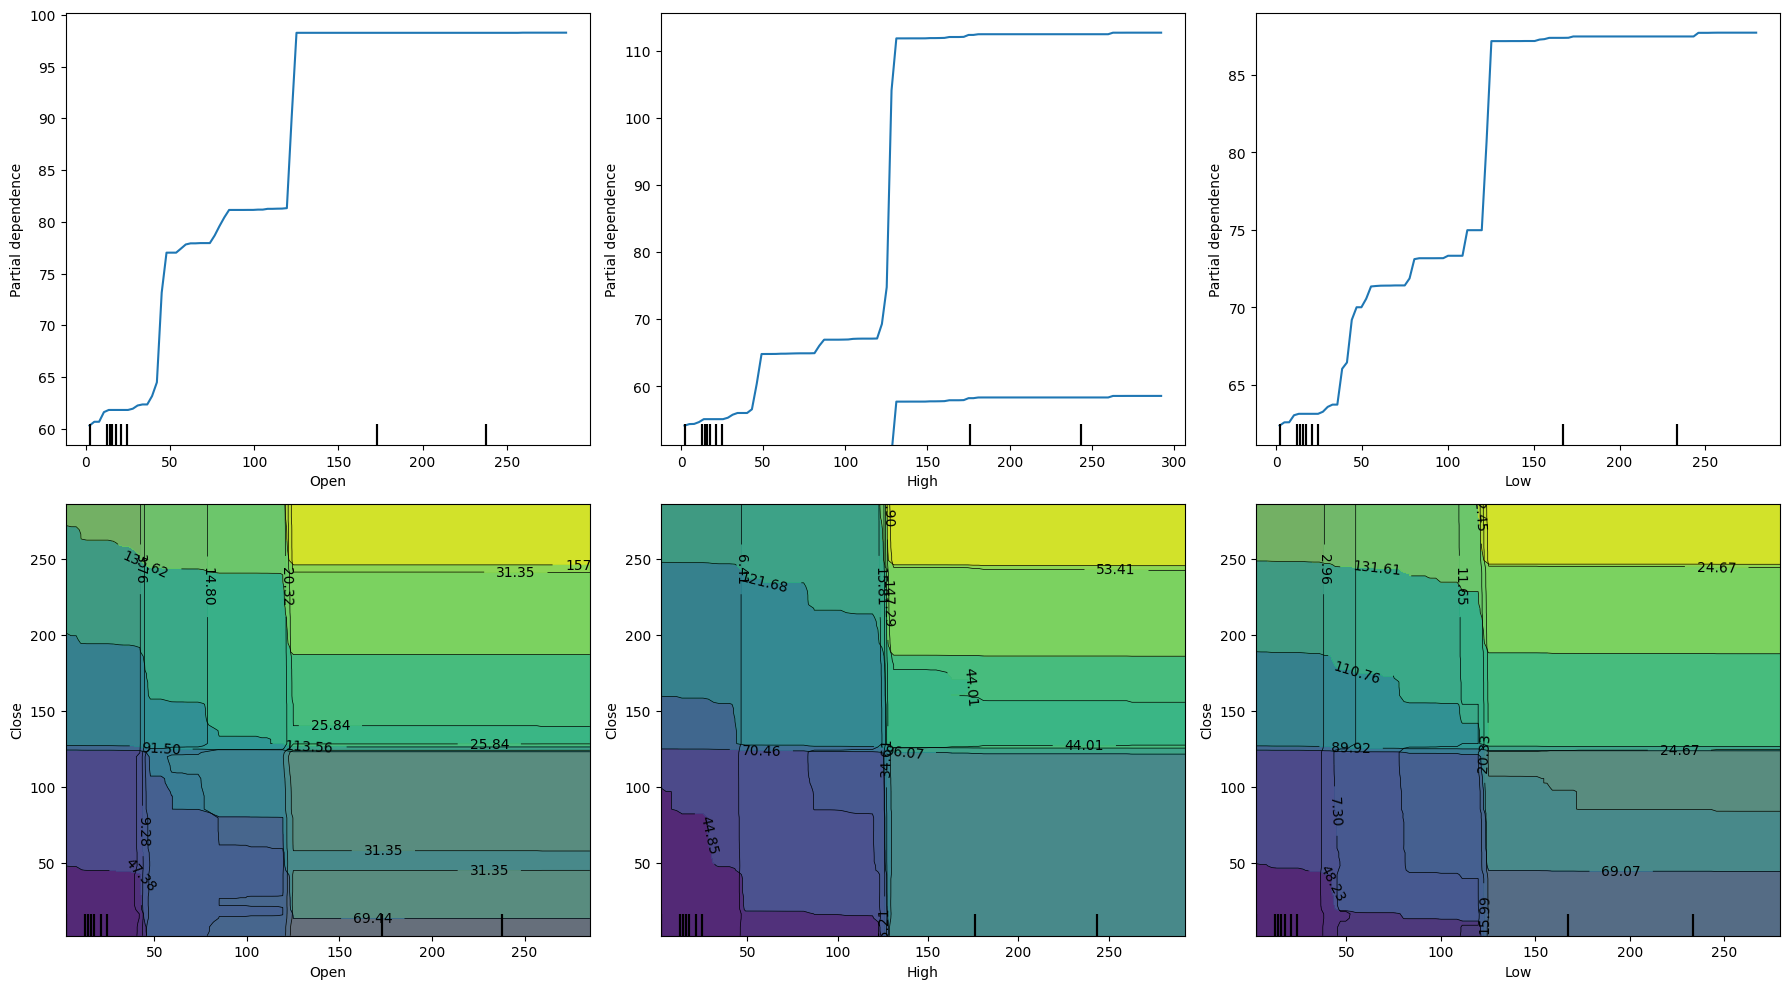

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Create the figure  size for each subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns for 6 subplots

features = [0, 1, 2, (0, 3), (1, 3), (2, 3)]

# Plot the PDPs
for i, feature in enumerate(features):
    ax1 = axes.flatten()[i]  # Get the current axis
    display = PartialDependenceDisplay.from_estimator(rf_model, X, [feature], ax=ax1, kind='average', centered=True)
    display.plot(ax=display.axes_)

plt.tight_layout()  # Adjust subplot layout for better visualization
plt.show()

#QR5 How does the choice of time intervals impact long-term trends and short-term price fluctuations when employing XAI algorithms?

 99%|===================| 2766/2795 [01:00<00:00]       

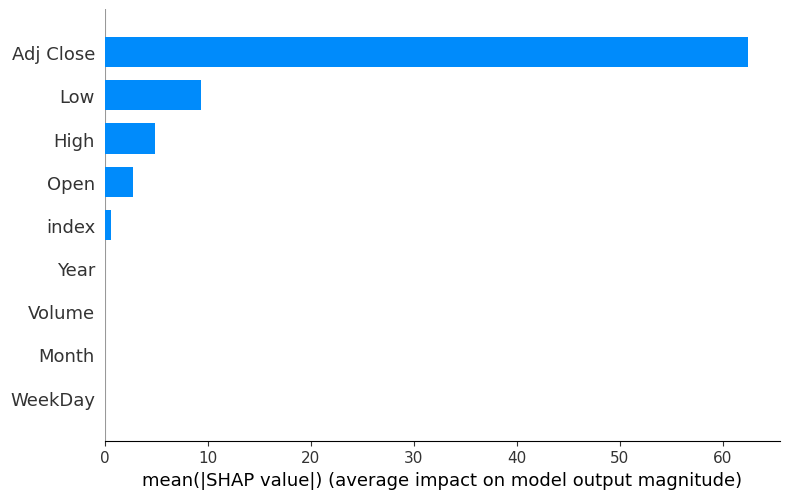

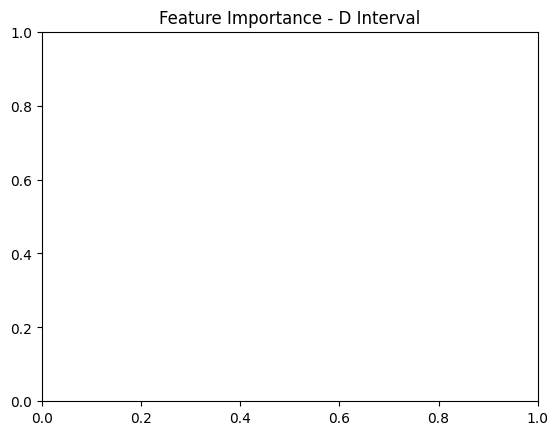

 96%|=================== | 574/595 [00:11<00:00]       

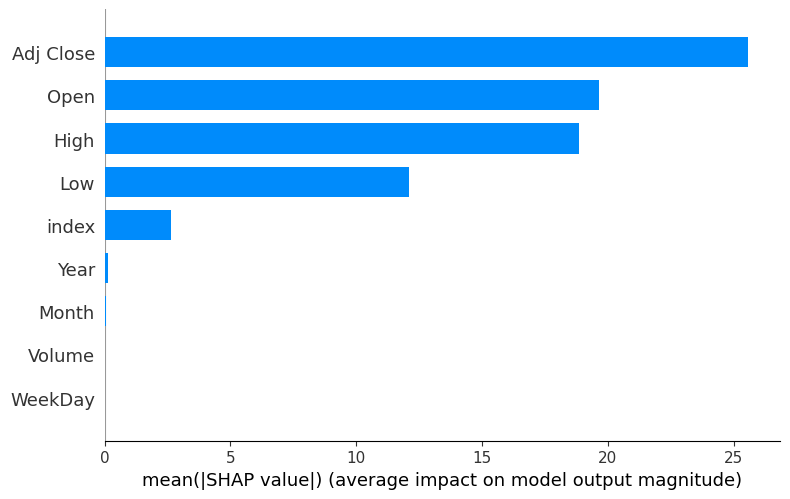

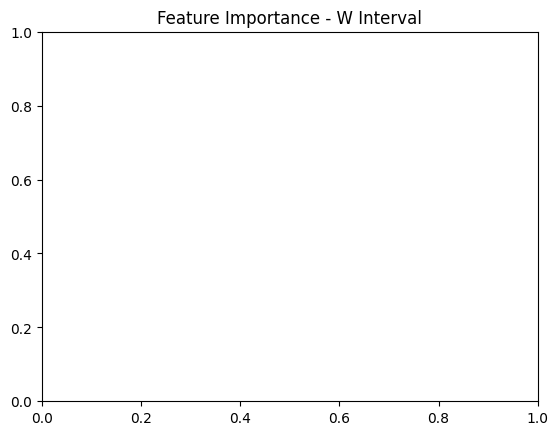

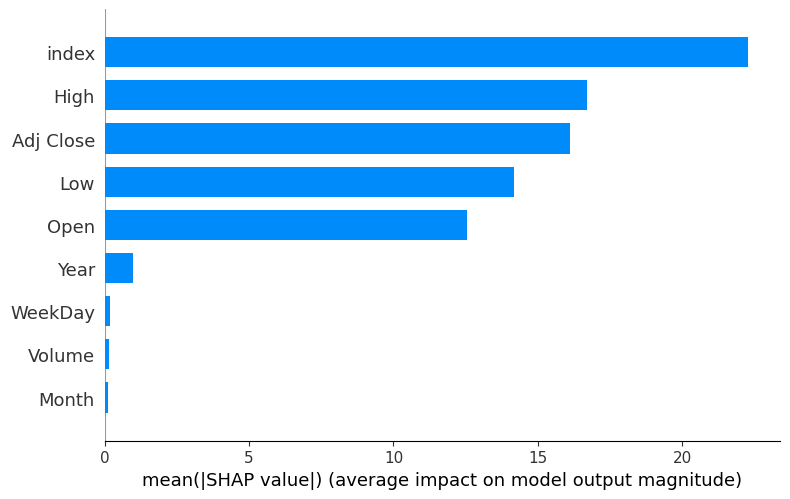

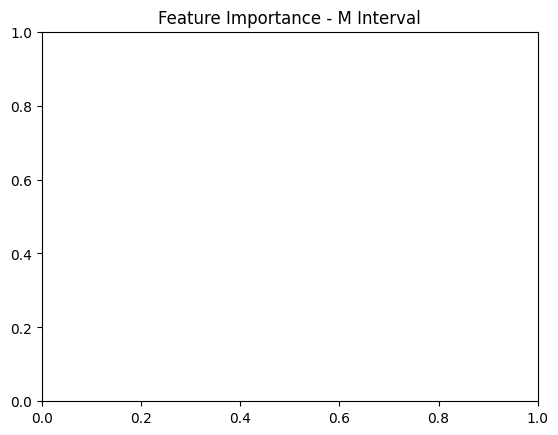

In [ ]:
# Assuming 'stock_data' contains your dataset
stock_data = stock_df.copy()

# Set the Date column as the index
stock_data.set_index('Date', inplace=True)

# Function to create subsets based on time intervals
def create_time_intervals(data, interval):
    return data.resample(interval).mean().dropna()

# Define different time intervals
intervals = ['D', 'W', 'M']  # Daily, Weekly, Monthly

# Loop through intervals and analyze impact on feature importance
for interval in intervals:
    # Create subset based on the interval
    subset = create_time_intervals(stock_data, interval)

    # Features and target
    X = subset.drop('Close', axis=1)
    y = subset['Close']

    # Train a RandomForestRegressor model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Use Shapley values to explain model predictions
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    # Visualize Shapley values or analyze feature importance as per requirement
    shap.summary_plot(shap_values, X, plot_type="bar")
    plt.title(f"Feature Importance - {interval} Interval")
    plt.show()